In [11]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

In [12]:
data = pd.read_csv('Surgery Treatment.csv', parse_dates=['CRD', 'DATE_BOOKING_MADE', 'TCI_DATE'], date_format='%d-%b-%y')

In [23]:
data['CRD'].value_counts().mean()

1.5363636363636364

In [14]:
data['PRIORITY_TYPE_c'] = ['r' if p == 'U' else 'b' for p in data['PRIORITY_TYPE']]

In [15]:
data['CRD_rank'] = data['CRD'].rank()
data['TCI_DATE_rank'] = data['TCI_DATE'].rank()

In [16]:
data

,WALISID,CRD,DATE_BOOKING_MADE,TCI_DATE,PRIORITY_TYPE,CONSULTANT,PRIORITY_TYPE_c,CRD_rank,TCI_DATE_rank
0,5947838,2021-01-04,2021-01-18,2021-02-25,U,2602700,r,1.0,20.0
1,5947185,2021-01-06,2021-01-06,2021-01-21,U,2602700,r,2.5,3.0
2,5947448,2021-01-06,2021-01-07,2021-01-21,U,2602700,r,2.5,3.0
3,5947596,2021-01-07,2021-01-08,2021-01-21,U,2602700,r,4.0,3.0
4,5948015,2021-01-11,2021-01-18,2021-01-27,U,3730335,r,5.0,7.5
...,...,...,...,...,...,...,...,...,...
164,6015148,2021-12-01,2021-12-01,2021-12-31,U,3730335,r,165.0,167.0
165,6017561,2021-12-10,2021-12-10,2021-12-31,U,3730335,r,166.0,167.0
166,6018199,2021-12-14,2021-12-17,2021-12-31,U,3730335,r,167.0,167.0
167,6020035,2021-12-22,2021-12-22,2021-12-31,U,3730335,r,168.5,167.0


In [20]:
1 / data['TCI_DATE'].value_counts().mean()

0.3195266272189349

In [5]:
data['overtakes'] = data['TCI_DATE_rank'] - data['CRD_rank']
data['bumped_down'] = data['overtakes'] > 0
data['wait'] = (data['TCI_DATE'] - data['CRD']).apply(lambda x: x.days)
num_down = data['bumped_down'].value_counts()

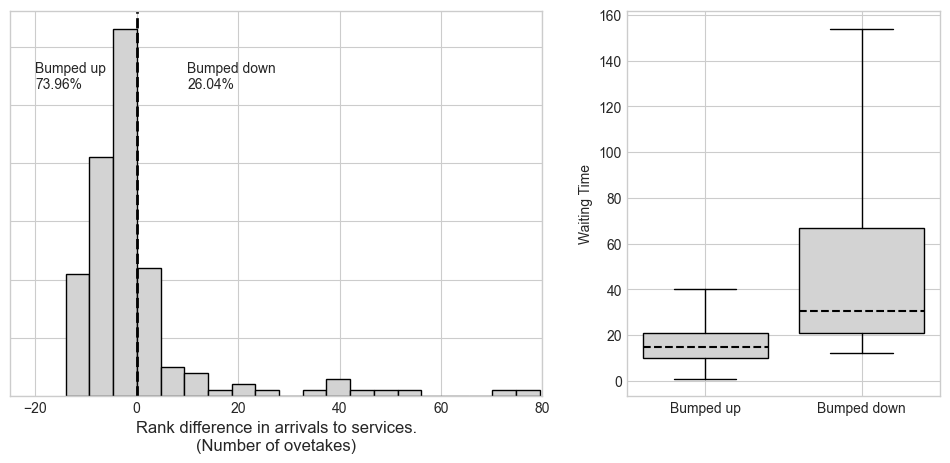

In [6]:
gs_kw = dict(width_ratios=[1.7, 1])
fig, axarr = plt.subplots(1, 2, gridspec_kw=gs_kw, figsize=(12, 5))
axarr[0].hist(data['overtakes'], bins=20, edgecolor='black', color='lightgrey')
axarr[0].set_xlabel("Rank difference in arrivals to services.\n(Number of ovetakes)", fontsize=12)
axarr[0].set_yticklabels([])
ymin, ymax = axarr[0].get_ylim()
axarr[0].vlines(x=0, ymin=ymin, ymax=ymax, color='black', linewidth=2, linestyle='dashed')
axarr[0].set_ylim(ymin, ymax)
axarr[0].set_xlim(-25, 80)
axarr[0].text(-20, ymax*0.8, f'Bumped up\n{round((num_down / num_down.sum())[False] * 100, 2)}%')
axarr[0].text(10, ymax*0.8, f'Bumped down\n{round((num_down / num_down.sum())[True] * 100, 2)}%')

medianprops = dict(linestyle='dashed', linewidth=1.5, color='black')
bplot = axarr[1].boxplot(
    [data[~data['bumped_down']]['wait'], data[data['bumped_down']]['wait']],
    widths=0.8,
    whis=(0, 100),
    patch_artist=True,
    medianprops=medianprops
)
for patch in bplot['boxes']:
    patch.set_facecolor('lightgrey')
    
axarr[1].set_xticklabels(['Bumped up', 'Bumped down'])
axarr[1].set_ylabel('Waiting Time')
plt.show()

In [7]:
data

,WALISID,CRD,DATE_BOOKING_MADE,TCI_DATE,PRIORITY_TYPE,CONSULTANT,PRIORITY_TYPE_c,CRD_rank,TCI_DATE_rank,overtakes,bumped_down,wait
0,5947838,2021-01-04,2021-01-18,2021-02-25,U,2602700,r,1.0,20.0,19.0,True,52
1,5947185,2021-01-06,2021-01-06,2021-01-21,U,2602700,r,2.5,3.0,0.5,True,15
2,5947448,2021-01-06,2021-01-07,2021-01-21,U,2602700,r,2.5,3.0,0.5,True,15
3,5947596,2021-01-07,2021-01-08,2021-01-21,U,2602700,r,4.0,3.0,-1.0,False,14
4,5948015,2021-01-11,2021-01-18,2021-01-27,U,3730335,r,5.0,7.5,2.5,True,16
...,...,...,...,...,...,...,...,...,...,...,...,...
164,6015148,2021-12-01,2021-12-01,2021-12-31,U,3730335,r,165.0,167.0,2.0,True,30
165,6017561,2021-12-10,2021-12-10,2021-12-31,U,3730335,r,166.0,167.0,1.0,True,21
166,6018199,2021-12-14,2021-12-17,2021-12-31,U,3730335,r,167.0,167.0,0.0,False,17
167,6020035,2021-12-22,2021-12-22,2021-12-31,U,3730335,r,168.5,167.0,-1.5,False,9
